# Importing some of the libraries to be use 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

# Reading the CSV file (Importing the dataset)

In [2]:
data = pd.read_csv('winequality.csv')

# Printing the first 5 dataset values

In [3]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

# Checking the information of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Checking the column names of each column

In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# exploring the descriptive statistical measures for the dataset

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


# checking the columns that may have null values

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Visualizing the data distribution

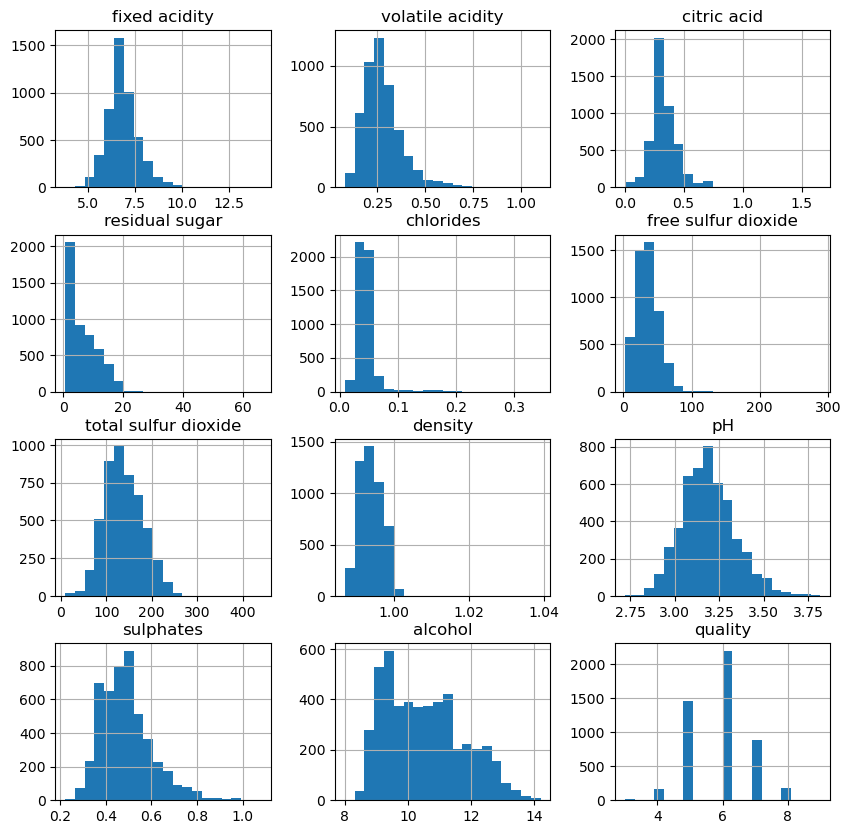

In [8]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

## The rating of the wine base on the quality

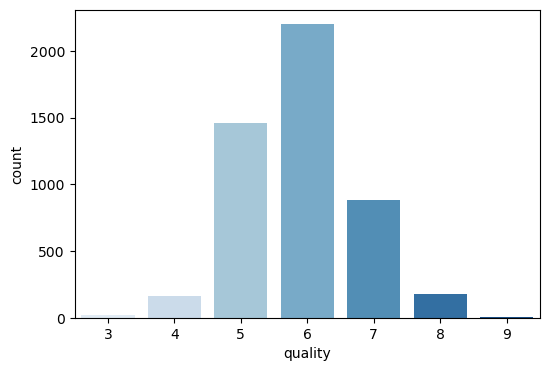

In [13]:
plt.figure(figsize=(6, 4))
sb.countplot(x='quality', data=data, palette='Blues')
plt.show()

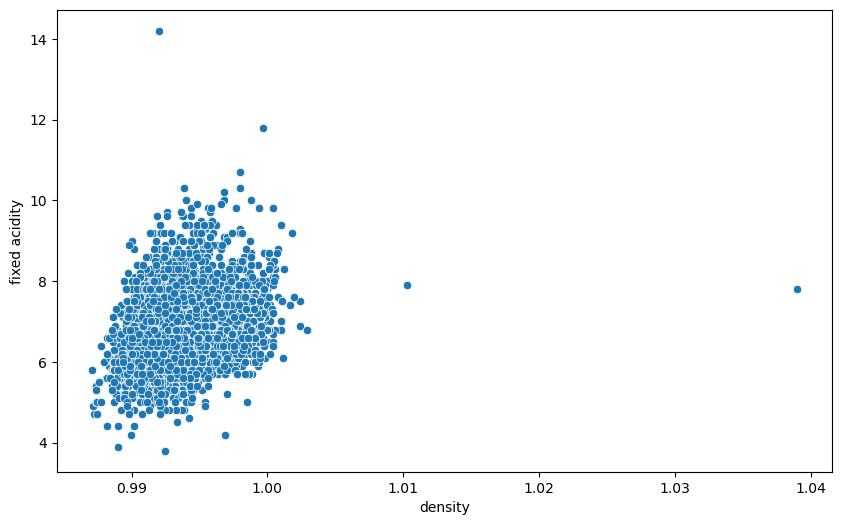

In [14]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='density', y='fixed acidity', data=data, palette='Reds')
plt.show()

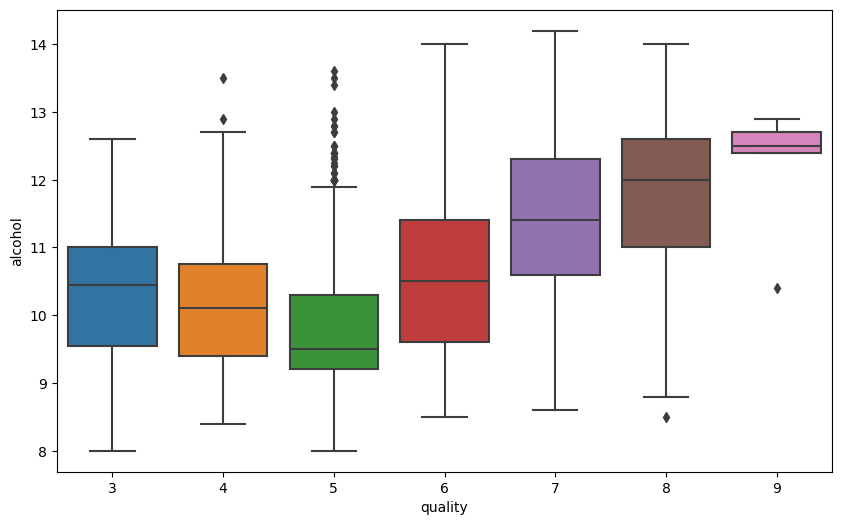

In [15]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='quality', y='alcohol', data=data)
plt.show()

# Using the heat map to see the correlation between the variabes

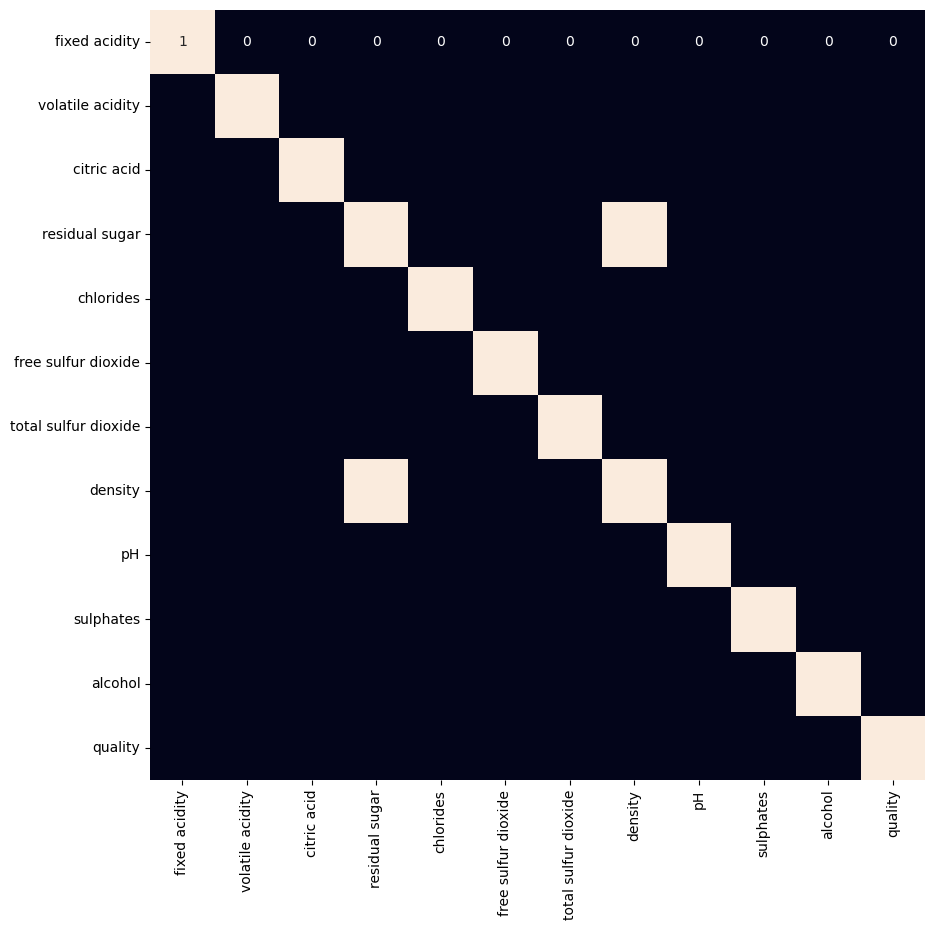

In [17]:
plt.figure(figsize=(10, 10))
sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

# Developing a Model for our dataset

### We will fisrt prepare our data for trainning and split it into training and validation.
### this will help us to in seleting the modell that performs best

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [42]:
data['best quality'] = [1 if x > 5 else 0 for x in data.quality]

In [43]:
features = data.drop(['quality', 'best quality'], axis=1)
target = data['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((3918, 11), (980, 11))

### We normalised the data before training in order to get stable and fast  training of the model

In [44]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

### Now we can train some of the models

In [45]:
models = [LogisticRegression(), SVC(kernel='rbf')]

for i in range(2):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} :')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()


LogisticRegression() :
Training Accuracy :  0.6756767198988433
Validation Accuracy :  0.6861072261072262

SVC() :
Training Accuracy :  0.7239951646138716
Validation Accuracy :  0.7188344988344989



### from the above results, we can see that the Logistic  Regression classifier performs better on Validation data than training
### while on the SVC classifier, the training and the validation performance are even.

# Now we plot the confusion matrix for the validation and training data of both the Logistic Regression and the SVC

<function matplotlib.pyplot.show(close=None, block=None)>

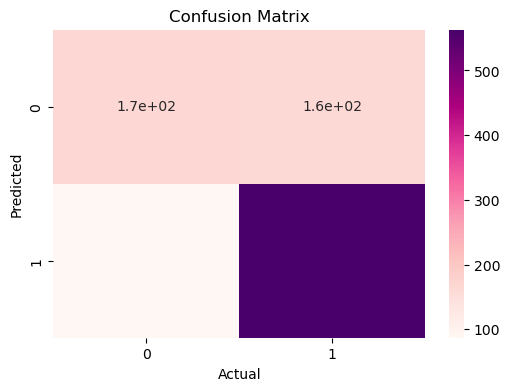

In [61]:
reg = LogisticRegression()
reg.fit(xtrain, ytrain)
regpred = reg.predict(xtest)

plt.figure(figsize=(6, 4))
sb.heatmap(confusion_matrix(ytest, regpred), annot=True, cmap="RdPu")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show

In [56]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))
print("Accuracy of Logistic Regression is : ",metrics.accuracy_score(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       330
           1       0.80      0.89      0.84       650

    accuracy                           0.77       980
   macro avg       0.75      0.72      0.73       980
weighted avg       0.77      0.77      0.77       980

Accuracy of Logistic Regression is :  0.773469387755102
